# 問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$
h
θ
(
x
)
=
θ
0
x
0
+
θ
1
x
1
+
.
.
.
+
θ
j
x
j
+
.
.
.
+
θ
n
x
n
.
(
x
0
=
1
)
$


In [442]:
# 重回帰分析の式が鍵
# xとyの合計値を計算する 課題はshapeの形式と順番
# np.dot()
import numpy as np

def _linear_hypothesis(X):
    # θ = 回帰係数 
    # n = 特徴量の数（おそらくn_features）
    theta = np.random.rand(X.shape[1], 1)
    hypothesis = np.dot(X, theta).reshape(-1)
    return  hypothesis

In [443]:
# 色々検証

from sklearn.datasets import load_iris
alpha = 0.001
iris = load_iris()

x =iris.data
y =iris.target

print(_linear_hypothesis(x).shape)

e = np.arange(0,150)
f = np.arange(0,600).reshape(150,4)
np.dot(e,f)
y.shape

df = pd.read_csv('/Users/yuki.tatsuoka/Downloads/house-prices-advanced-regression-techniques (1)/train.csv')
y = df['SalePrice'].to_numpy()
x = df.loc[:, ['GrLivArea','YearBuilt']].to_numpy()

print(_linear_hypothesis(x).shape)


(150,)
(1460,)


# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [363]:
# 提出用
def _gradient_descent(self, X,  error, y):
    tmp = (error - y).reshape(-1,1)
    for i in range(X.shape[1])
    self_theta[i] = self.theta[i] - (self.lr/X.shape[0]) * (np.sum(np.dot(error.T, X), axis=0))


In [296]:
#  検証用
def _gradient_descent(X, y,lr=0.001):
    theta = np.random.rand(X.shape[1], 1)
    hypothesis = np.dot(X, theta)
    error =  _linear_hypothesis(X) - y.reshape(-1,1)
    print(error.shape)
    theta = theta - (lr/y.shape[0]) * (np.sum(np.dot(error.T, X)))
    print(np.dot(error.T, X))
    print(np.sum(np.dot(error.T, X)))
    print((1/y.shape[0]) * (np.sum(np.dot(error.T, X))))
    return theta
    # 1/mとxjとΣが少し曖昧
    # インデックスは配列的に検討不要?

In [417]:
#  検証用
def _gradient_descent3(X, y,lr=0.001):
    theta = np.random.rand(X.shape[1], 1)
    hypothesis = np.dot(x, theta)
    
    error =  _linear_hypothesis(X) - y.reshape(-1,1)
    print(error.shape)
    theta = theta - lr* np.mean((np.sum(error * X, axis=0)))
    print('-'*50)
    print((error*X).shape)
    print('-'*50)
    print(np.sum(error*X, axis=0))
    return theta
   #print(1/y.shape[0] * np.sum(error, X))
   

In [418]:
# 検証


a = _gradient_descent3(x,y)

a.shape


(1460, 1)
--------------------------------------------------
(1460, 2)
--------------------------------------------------
[-4.38319797e+11 -5.16073808e+11]


(2, 1)

In [523]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLinearRegression():

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # 学習回数 = データ数/分割したサイズ　
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter) # 学習回数をnp.zerosに入れている。　この説明？？？
        self.val_loss = np.zeros(self.iter) # 学習回数をnp.zerosに入れている。この説明？？？
        self.theta = np.random.rand(X.shape[1], 1)
        
    # 仮定関数の策定
    def _linear_hypothesis(self, X):
        # θ = 回帰係数
        # n = 特徴量の数（おそらくn_features）
        hypothesis = np.dot(X, self.theta)
        return  hypothesis

    def fit(self, X, y, X_val, y_val, lr=0.01):
        self.list_loss = []
        self.list_val_loss = []
        
        # 処理が回らなければerrorをfor文のi番目で処理して１次元を計算する
        pred = self._linear_hypothesis(X)
        
        for i in range(self.iter):     
            error = pred[0] - y[0] 
            self._gradient_descent(X, error, y)
            train_pred = self._linear_hypothesis(X)
            train_loss,_ = self.cost_function(train_pred, y)
            self.list_loss.append(train_loss)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力　
                print('itelation {}, val_loss{}'.format(i, train_loss)) # 計算式を入れる

        if X_val.all() ==True and y_val.all() == True:
            for i in range(self.iter): 
                error = pred[0] - y_val[0] 
                self._gradient_descent(X_val, error, y_val)
                val_pred = self._linear_hypothesis(X_val)
                _,val_loss = self.cost_function(val_pred, y_val)
                self.list_val_loss.append(val_loss)
            
                if self.verbose:
                #verboseをTrueにした際は学習過程を出力　
                    print('itelation {}, val_loss{}'.format(i, val_loss)) # 計算式を入れる
        
    
    def predict(self, X):
        y_pred = self._linear_hypothesis(X)
        return y_pred
    
    def _gradient_descent(self, X,  error, y):
        tmp = error - y
        tmp= tmp.reshape(-1,1)
        sum_tmp =  np.sum(np.dot(tmp.T, X), axis=0)
        for i in range(X.shape[1]):
            self.theta[i] = self.theta[i] - ((self.lr/X.shape[0]) * sum_tmp[i])

        # 処理が回らなければerrorをfor文のi番目で処理して１次元を計算する
     
    def cost_function(self, y_pred, y):
        loss = y.shape[0] * np.sum((y_pred[0] - y[0])**2) / 2
        self.loss = loss
        self.val_loss = loss
        return self.loss, self.val_loss
        
        #学習曲線を表示する 


# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。





In [189]:
# 一部抜粋
def predict(self, X):
    y_pred = self._linear_hypothesis(X)
    return y_pred

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

In [16]:
def MSE(self, y_pred, y):
    mse = (1/y.shape[0]) * np.sum(np.square(y_pred - y))
    return mse

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。



In [17]:
def cost_function(y_pred, y):
    loss = (1/2*y.shape[0]) * np.sum(np.square(y_pred - y))
    return loss

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [526]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/yuki.tatsuoka/Downloads/house-prices-advanced-regression-techniques (1)/train.csv')
y = df['SalePrice'].to_numpy()
X = df.loc[:, ['GrLivArea','YearBuilt']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 実装
model = ScratchLinearRegression(1000,1e-10, False, True)

model.fit(X_train, y_train, X_test, y_test)

#model.predict(X_test)




itelation 0, val_loss19646202221353.336
itelation 1, val_loss19597109401805.64
itelation 2, val_loss19548077996694.555
itelation 3, val_loss19499108006020.09
itelation 4, val_loss19450199429782.227
itelation 5, val_loss19401352267980.973
itelation 6, val_loss19352566520616.332
itelation 7, val_loss19303842187688.305
itelation 8, val_loss19255179269196.887
itelation 9, val_loss19206577765142.082
itelation 10, val_loss19158037675523.883
itelation 11, val_loss19109559000342.3
itelation 12, val_loss19061141739597.324
itelation 13, val_loss19012785893288.957
itelation 14, val_loss18964491461417.207
itelation 15, val_loss18916258443982.062
itelation 16, val_loss18868086840983.527
itelation 17, val_loss18819976652421.605
itelation 18, val_loss18771927878296.3
itelation 19, val_loss18723940518607.598
itelation 20, val_loss18676014573355.504
itelation 21, val_loss18628150042540.027
itelation 22, val_loss18580346926161.164
itelation 23, val_loss18532605224218.902
itelation 24, val_loss1848492493

itelation 842, val_loss54505003027.38284
itelation 843, val_loss57123139105.92466
itelation 844, val_loss59802689621.07753
itelation 845, val_loss62543654572.84113
itelation 846, val_loss65346033961.215126
itelation 847, val_loss68209827786.20019
itelation 848, val_loss71135036047.79597
itelation 849, val_loss74121658746.00252
itelation 850, val_loss77169695880.8198
itelation 851, val_loss80279147452.24739
itelation 852, val_loss83450013460.28651
itelation 853, val_loss86682293904.93558
itelation 854, val_loss89975988786.19579
itelation 855, val_loss93331098104.06671
itelation 856, val_loss96747621858.54796
itelation 857, val_loss100225560049.64078
itelation 858, val_loss103764912677.34348
itelation 859, val_loss107365679741.65735
itelation 860, val_loss111027861242.58194
itelation 861, val_loss114751457180.11726
itelation 862, val_loss118536467554.26334
itelation 863, val_loss122382892365.01965
itelation 864, val_loss126290731612.38766
itelation 865, val_loss130259985296.36543
itelati

itelation 660, val_loss5653703360083.971
itelation 661, val_loss5665540476474.389
itelation 662, val_loss5677389971550.585
itelation 663, val_loss5689251845312.564
itelation 664, val_loss5701126097760.331
itelation 665, val_loss5713012728893.875
itelation 666, val_loss5724911738713.201
itelation 667, val_loss5736823127218.311
itelation 668, val_loss5748746894409.203
itelation 669, val_loss5760683040285.877
itelation 670, val_loss5772631564848.338
itelation 671, val_loss5784592468096.577
itelation 672, val_loss5796565750030.604
itelation 673, val_loss5808551410650.407
itelation 674, val_loss5820549449955.994
itelation 675, val_loss5832559867947.363
itelation 676, val_loss5844582664624.516
itelation 677, val_loss5856617839987.454
itelation 678, val_loss5868665394036.17
itelation 679, val_loss5880725326770.669
itelation 680, val_loss5892797638190.955
itelation 681, val_loss5904882328297.02
itelation 682, val_loss5916979397088.866
itelation 683, val_loss5929088844566.496
itelation 684, val

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。



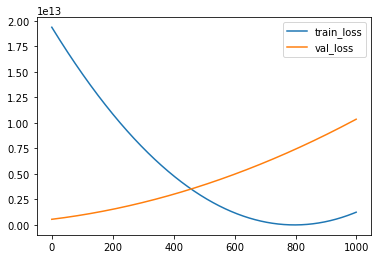

In [525]:

plt.plot(np.arange(1000), model.list_loss, label="train_loss")
plt.plot(np.arange(1000), model.list_val_loss,label="val_loss")
plt.legend()
plt.show()

#あってるのか不明。。。

# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

# 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

# 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。



# 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。